In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib notebook
sns.set()

In [54]:
import glob

mdetcal_files = glob.glob('mdetcal*.pkl')

mdets = []
mdetcals = []
for mdetcal_file in mdetcal_files:
    mdet_file = mdetcal_file.replace('mdetcal', 'mdet')
    with open(mdet_file, 'rb') as fp:
        mdet = pickle.load(fp)

    with open(mdetcal_file, 'rb') as fp:
        mdetcal = pickle.load(fp)    
    
    mdets.append(mdet)
    mdetcals.append(mdetcal)

In [58]:
def _measure_diffs(kind, mdet, mdetcal, xkind='wmom_s2n'):
    mdet_inds = np.argsort(mdet[kind]['mcal_sx_col'])
    mdetcal_inds = np.argsort(mdetcal[kind]['mcal_sx_col'])
    imcen = (225-1)/2

    if xkind == 'distance to center':
        xval = np.sqrt(
            (mdet[kind]['mcal_sx_col'][mdet_inds] - imcen)**2 + 
            (mdet[kind]['mcal_sx_row'][mdet_inds] - imcen)**2)
        xlabel = 'distance to center'
    elif xkind == 'sx col':
        xval = mdet[kind]['mcal_sx_col'][mdet_inds]
        xlabel = 'sx col'
    elif xkind == 'wmom_T_ratio':
        xval = mdet[kind]['wmom_T_ratio'][mdet_inds]
        xlabel = 'wmom_T_ratio'
    elif xkind == 'wmom_s2n':
        xval = np.log10(mdet[kind]['wmom_s2n'][mdet_inds])
        xlabel = 'wmom_s2n'
    
    dg1 = mdetcal[kind]['wmom_g'][mdetcal_inds, 0] - mdet[kind]['wmom_g'][mdet_inds, 0]
    dg2 = mdetcal[kind]['wmom_g'][mdetcal_inds, 1] - mdet[kind]['wmom_g'][mdet_inds, 1]
    dsx = mdetcal[kind]['mcal_sx_col'][mdetcal_inds] - mdet[kind]['mcal_sx_col'][mdet_inds]
    s2n = mdet[kind]['wmom_s2n'][mdet_inds]
    dx = mdet[kind]['mcal_sx_col'][mdet_inds] - imcen
    dy = mdet[kind]['mcal_sx_row'][mdet_inds] - imcen
    return xval, dsx, dg1, dg2, s2n, dx, dy

xval = []
dsx = []
dg1 = []
dg2 = []
s2n = []
dx = []
dy = []
xkind = 'distance to center'
for mdet, mdetcal in zip(mdets, mdetcals):
    tup = _measure_diffs('1p', mdet, mdetcal, xkind=xkind)
    xval.append(tup[0])
    dsx.append(tup[1])
    dg1.append(tup[2])
    dg2.append(tup[3])
    s2n.append(tup[4])
    dx.append(tup[5])
    dy.append(tup[6])

xval = np.concatenate(xval)
xlabel = '%s' % xkind
dsx = np.concatenate(dsx)
dg1 = np.concatenate(dg1)
dg2 = np.concatenate(dg2)
s2n = np.concatenate(s2n)
dx = np.concatenate(dx)
dy = np.concatenate(dy)

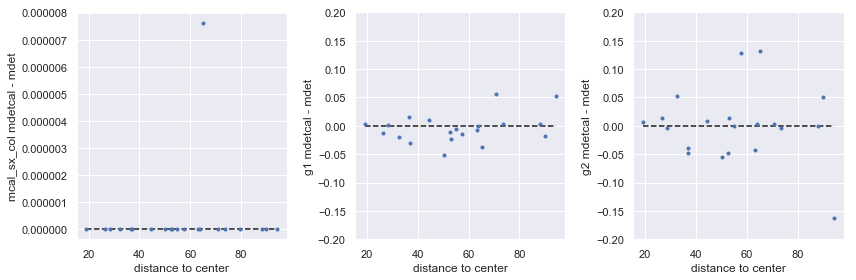

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axs[0].plot(
    xval,
    dsx,
    '.')
axs[0].hlines(0, xval.min(), xval.max(), color='k', linestyle='dashed')
axs[0].set_xlabel(xlabel)
axs[0].set_ylabel('mcal_sx_col mdetcal - mdet')

axs[1].plot(
    xval,
    dg1,
    '.')
axs[1].hlines(0, xval.min(), xval.max(), color='k', linestyle='dashed')
axs[1].set_xlabel(xlabel)
axs[1].set_ylabel('g1 mdetcal - mdet')
axs[1].set_ylim((-0.2, 0.2))

axs[2].plot(
    xval,
    dg2,
    '.')
axs[2].hlines(0, xval.min(), xval.max(), color='k', linestyle='dashed')
axs[2].set_xlabel(xlabel)
axs[2].set_ylabel('g2 mdetcal - mdet')
axs[2].set_ylim((-0.2, 0.2))

plt.tight_layout()

Text(0.5, 1.0, 'std. of difference in g1')

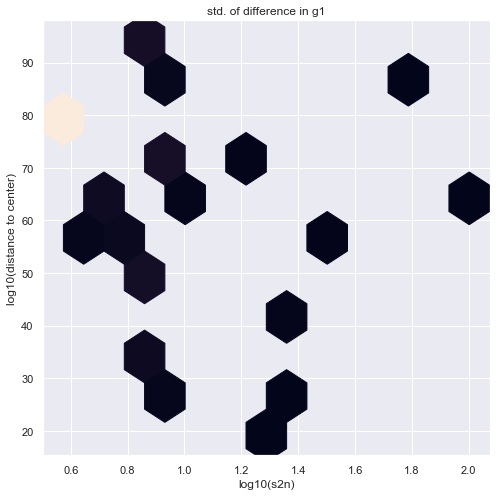

In [60]:
plt.figure(figsize=(8, 8))
plt.hexbin(np.log10(s2n), xval, C=dg1, gridsize=10, reduce_C_function=lambda x: np.max(np.abs(x)))
plt.xlabel('log10(s2n)')
plt.ylabel('log10(distance to center)')
plt.title('std. of difference in g1')

In [ ]:
msk = s2n >= 50

In [ ]:
plt.figure(figsize=(10, 10))
jg = sns.jointplot(xval[msk], dg1[msk], kind='hex', joint_kws={'extent': [0, 120, -0.4, 0.4]})
jg.set_axis_labels('distance to center', 'diff. in g1')

In [ ]:
with open('mdet.pkl', 'rb') as fp:
    mdet = pickle.load(fp)

with open('mdetcal.pkl', 'rb') as fp:
    mdetcal = pickle.load(fp)

In [ ]:
def _compare_kind(kind, mdet, mdetcal, xkind='sx col'):
    mdet_inds = np.argsort(mdet[kind]['mcal_sx_col'])
    mdetcal_inds = np.argsort(mdetcal[kind]['mcal_sx_col'])

    # it is not the distanace to the center
    if xkind == 'distance to center':
        imcen = (225-1)/2
        xval = np.sqrt(
            (mdet[kind]['mcal_sx_col'][mdet_inds] - imcen)**2 + 
            (mdet[kind]['mcal_sx_row'][mdet_inds] - imcen)**2)
        xlabel = 'distance to center'
    elif xkind == 'sx col':
        xval = mdet[kind]['mcal_sx_col'][mdet_inds]
        xlabel = 'sx col'
    elif xkind == 'wmom_T_ratio':
        xval = mdet[kind]['wmom_T_ratio'][mdet_inds]
        xlabel = 'wmom_T_ratio'
    elif xkind == 'wmom_s2n':
        xval = mdet[kind]['wmom_s2n'][mdet_inds]
        xlabel = 'wmom_s2n'
        
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

    axs[0].plot(
        xval,
        mdetcal[kind]['mcal_sx_col'][mdetcal_inds] - mdet[kind]['mcal_sx_col'][mdet_inds],
        'o')
    axs[0].hlines(0, xval.min(), xval.max(), color='k', linestyle='dashed')
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel('mcal_sx_col mdetcal - mdet')

    axs[1].plot(
        xval,
        mdetcal[kind]['wmom_g'][mdetcal_inds, 0] - mdet[kind]['wmom_g'][mdet_inds, 0],
        'o')
    axs[1].hlines(0, xval.min(), xval.max(), color='k', linestyle='dashed')
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel('g1 mdetcal - mdet')

    axs[2].plot(
        xval,
        mdetcal[kind]['wmom_g'][mdetcal_inds, 1] - mdet[kind]['wmom_g'][mdet_inds, 1],
        'o')
    axs[2].hlines(0, xval.min(), xval.max(), color='k', linestyle='dashed')
    axs[2].set_xlabel(xlabel)
    axs[2].set_ylabel('g2 mdetcal - mdet')
    
    plt.tight_layout()

In [ ]:
_compare_kind('noshear', mdet, mdetcal, xkind='wmom_s2n')